# Stanford CME 241 (Winter 2025) - Assignment 2

**Due: Tuesday, February 4 @ 11:59 PM PST on Gradescope.**

Assignment instructions:
- Make sure each of the subquestions have answers
- Ensure that group members indicate which problems they're in charge of
- Show work and walk through your thought process where applicable
- Empty code blocks are for your use, so feel free to create more under each section as needed
- Document code with light comments (i.e. 'this function handles visualization')

Submission instructions:
- When complete, fill out your publicly available GitHub repo file URL and group members below, then export or print this .ipynb file to PDF and upload the PDF to Gradescope.

*Link to this ipynb file in your public GitHub repo (replace below URL with yours):* 

https://github.com/ranystephan/RL-book/blob/master/ranycs_assts_solving/ranycs_asst1/ranycs_assignment1.ipynb

https://github.com/cocosrv/technical-documents/blob/master/finance/cme241/assignments/Winter2025/assignment1.ipynb

*Group members (replace below names with people in your group):* 
- Rany Stephan - ranycs@stanford.edu
- Corentin Servouze - cosrv@stanford.edu

## Imports

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sys 
sys.path.append('/Users/ranystephan/Desktop/problemst/cme241/RL-book/')

## Question 1: Job-Hopping and Wages-Utility-Maximization (Led by Corentin)

You are a worker who starts every day either employed or unemployed. If you start your day employed, you work on your job for the day (one of $n$ jobs, as elaborated later) and you get to earn the wage of the job for the day. However, at the end of the day, you could lose your job with probability $\alpha \in [0,1]$, in which case you start the next day unemployed. If at the end of the day, you do not lose your job (with probability $1-\alpha$), then you will start the next day with the same job (and hence, the same daily wage). 

On the other hand, if you start your day unemployed, then you will be randomly offered one of $n$ jobs with daily wages $w_1, w_2, \ldots w_n \in \mathbb{R}^+$ with respective job-offer probabilities $p_1, p_2, \ldots p_n \in [0,1]$ (with $\sum_{i=1}^n p_i = 1$). You can choose to either accept or decline the offered job. If you accept the job offer, your day progresses exactly like the **employed-day** described above (earning the day's job wage and possibly (with probability $\alpha$) losing the job at the end of the day). However, if you decline the job offer, you spend the day unemployed, receive the unemployment wage $w_0 \in \mathbb{R}^+$ for the day, and start the next day unemployed.

The problem is to identify the optimal choice of accepting or rejecting any of the job offers the worker receives, in a manner that maximizes the infinite-horizon **Expected Discounted-Sum of Wages Utility**. Assume the daily discount factor for wages (employed or unemployed) is $\gamma \in [0,1])$. Assume Wages Utility function to be $U(w) = \log(w)$ for any wage amount $w \in \mathbb{R}^+$. The goal is to maximize:

$$
\mathbb{E}\left[\sum_{u=t}^\infty \gamma^{u-t} \cdot \log(w_{i_u})\right]
$$

at the start of a given day $t$ ($w_{i_u}$ is the wage earned on day $u$, $0 \leq i_u \leq n$ for all $u \geq t$).

---

### Subquestions

#### Part (A): MDP Modeling

Express the job-hopping problem as an MDP using clear mathematical notation by defining the following components:

1. **State Space**: Define the possible states of the MDP.
2. **Action Space**: Specify the actions available to the worker at each state.
3. **Transition Function**: Describe the probabilities of transitioning between states for each action.
4. **Reward Function**: Specify the reward associated with the states and transitions.
5. **Bellman Optimality Equation**: Write the Bellman Optimality Equation customized for this MDP.

---

#### Part (B): Python Implementation

Write Python code that:

1. Solves the Bellman Optimality Equation (hence, solves for the **Optimal Value Function** and the **Optimal Policy**) with a numerical iterative algorithm. 
2. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

*Note*: For this problem, write the algorithm from scratch without using any prebuilt MDP/DP libraries or code.

---

#### Part (C): Visualization and Analysis

1. Plot the **Optimal Value Function** as a function of the state for a specific set of parameters ($n$, $w_1, \ldots, w_n$, $p_1, \ldots, p_n$, $\alpha$, $\gamma$, $w_0$).
2. Include these graphs in your submission.

---

#### Part (D): Observations

1. What patterns do you observe in the **Optimal Policy** as you vary the parameters $n$, $\alpha$, and $\gamma$?
2. Provide a brief discussion of your findings.

---

### Part (A) Answer

<span style="color:red">

#### State Space:  

The state of the system at any time $t$ can be represented as:
$$\mathcal{S} = \{(e,j)|e\in\{0,1\},j\in\{1,...,n\}\}$$
where $e = 0$ if the worker is unemployed at the beginning of the day, and $j$ is the proposed job.\
And $e=1$ if the worker is employed at the beginning of the day, and $j$ is the current job

#### Action Space:  

If $e = 0$, there are two actions: Accept (a) the job or reject (r) it. And if $e=1$, the only action possible is to continue (c) working.

#### Transition Function:  

$\textbf{if } e= 0$\
We have 

\begin{align*}
\mathcal{P}((0,j),a,(1,i)) &= \mathbb{I}_{i=j}(1-\alpha)\\
\mathcal{P}((0,j),a,(0,i)) &= \alpha p_i\\
\mathcal{P}((0,j),r,(1,i)) &= 0\\
\mathcal{P}((0,j),r,(0,i)) &= p_i\\
\end{align*}


$\textbf{if } e= 1$\
We have

\begin{align*}
\mathcal{P}((1,j),c,(1,i)) &= \mathbb{I}_{i=j}(1-\alpha)\\
\mathcal{P}((1,j),c,(0,i)) &= \alpha p_i\\
\end{align*}



#### Reward Function:  


We have 
\begin{align*}
\mathcal{R}((0,i),a) &= \log(w_i)\\
\mathcal{R}((0,i),r) &= \log(w_0)\\
\mathcal{R}((1,i),c) &= \log(w_i)\\
\end{align*}

#### Bellman Optimality Equation:  

Let's recall that $V^*(s) = \underset{a\in\mathcal{A}}{\max}\left(\mathcal{R}(s,a)+\gamma\displaystyle\sum_{s'\in\mathcal{S}}\mathcal{P}(s,a,s')V^*(s')\right)$\
In this situation we have 
\begin{align*}
V^*((1,i)) &= \log(w_i)+\gamma\alpha \displaystyle\sum_{i = 1}^np_jV^*((0,j))+\gamma(1-\alpha)V^*((1,i))\\
V^*((0,i)) &= \max\left(\log(w_i)+\gamma\alpha \displaystyle\sum_{i = 1}^np_jV^*((0,j))+\gamma(1-\alpha)V^*((1,i))\right.,\\
& \left.\log(w_0)+\gamma\displaystyle\sum_{i = 1}^np_jV^*((0,j))\right)
\end{align*}



</span>

### Part (B) Answer

In [16]:
def solve_mdp(
    n, w, p, alpha, gamma, w0, tol=1e-6, max_iter=1000
):
    """
    Solve the Bellman Optimality Equation using Value Iteration.

    Parameters:
        n (int): Number of jobs.
        w (List[float]): Wages for the jobs (length n).
        p (List[float]): Probabilities of receiving job offers (length n).
        alpha (float): Probability of losing a job at the end of a day.
        gamma (float): Discount factor.
        w0 (float): Unemployment wage.
        tol (float): Convergence tolerance.
        max_iter (int): Maximum number of iterations.

    Returns:
        V (np.ndarray): Optimal value function.
        policy (dict): Optimal policy.
    """
    # Initialize value function
    V = np.zeros((2,n))
    Q = np.zeros((2,n))
    pi = np.zeros((2,n))
    
    for iteration in range(max_iter):
        V_old = V.copy()
        
        # Update for employed states (1, j)
        V[1, :] = np.log(w) + gamma * alpha * np.sum(p * V_old[0, :]) + gamma * (1 - alpha) * V_old[1, :]


        # Update for unemployed state (0, j)
        Q[0,:] = np.log(w) + gamma * alpha * np.sum(p * V_old[0, :]) + gamma * (1 - alpha) * V_old[1, :]
        Q[1,:] = np.log(w0)+gamma * np.sum(p * V_old[0, :])
        V[0,:] = np.maximum(Q[0,:],Q[1,:])
        pi[0,:] = np.argmax(Q,axis = 0)

        # Check for convergence
        if np.max(np.abs(V - V_old)) < tol:
            break

    policy = {(0, i+1): ("reject" if pi[0, i] else "accept") for i in range(n)}|{(1,i+1) : "continue" for i in range(n)}

    return V, policy

# Example 
n = 5
w = [10, 20, 30, 40, 50] 
p = [0.2, 0.1, 0.3, 0.2, 0.2]  
alpha = 0.2
gamma = 0.9
w0 = 5  

V, policy = solve_mdp(n, w, p, alpha, gamma, w0)
print("Optimal Value Function:", V)
print("Optimal Policy:", policy)

Optimal Value Function: [[32.41804246 32.7051874  34.15327707 35.18071304 35.9776543 ]
 [30.22966176 32.7051874  34.15327707 35.18071304 35.9776543 ]]
Optimal Policy: {(0, 1): 'reject', (0, 2): 'accept', (0, 3): 'accept', (0, 4): 'accept', (0, 5): 'accept', (1, 1): 'continue', (1, 2): 'continue', (1, 3): 'continue', (1, 4): 'continue', (1, 5): 'continue'}


### Part (C) Answer

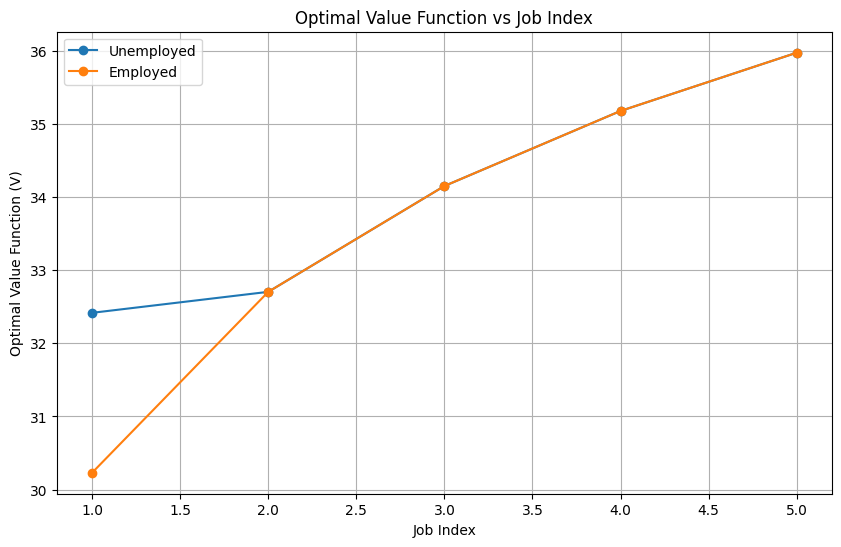

In [17]:
def plot_value_function(V, n):
    # Plot the value function for both employed and unemployed states.
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n+1), V[0, :], label="Unemployed", marker='o')
    plt.plot(range(1, n+1), V[1, :], label="Employed", marker='o')
    plt.xlabel('Job Index')
    plt.ylabel('Optimal Value Function (V)')
    plt.title('Optimal Value Function vs Job Index')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_value_function(V, n)

### Part (D) Answer

<span style="color:red">

If we classify the jobs purely based on their wages, we see that the lower-paying jobs are rejected, while the higher-paying ones are accepted. The threshold between acceptance and rejection simply shifts based on the worker's preferences and external factors. When we increase the probability of job loss ($\alpha$), the threshold for accepting a job decreases. This means that, with higher job insecurity, the worker becomes more cautious and more likely to reject lower-paying offers, as they are aware that losing the job might result in a less favorable outcome. Conversely, when we increase the discount factor ($\gamma$), the threshold for accepting a job increases. This indicates that, with a higher preference for future rewards, the worker is more willing to accept lower-paying jobs today in exchange for the potential long-term benefits of securing stable employment.

This behavior illustrates a form of risk aversion. When job loss is more likely (higher $\alpha$), workers tend to prefer the stability of unemployment unless the job offers a significantly higher wage, since the risk of losing the job in the short term outweighs the potential for future rewards. On the other hand, the long-term vs short-term trade-off is also evident. A high discount factor ($\gamma$) makes workers more inclined to accept a lower-paying job today, as they place greater value on future rewards. With a lower $\gamma$, they are more focused on immediate returns, and are less likely to accept jobs unless the wages are sufficient in the short run.

</span>

## Question 2: Two-Stores Inventory Control (Led by Rany)

We extend the capacity-constrained inventory example implemented in [rl/chapter3/simple_inventory_mdp_cap.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/chapter3/simple_inventory_mdp_cap.py) as a `FiniteMarkovDecisionProcess` (the Finite MDP model for the capacity-constrained inventory example is described in detail in Chapters 1 and 2 of the RLForFinanceBook). Here we assume that we have two different stores, each with their own separate capacities $C_1$ and $C_2$, their own separate Poisson probability distributions of demand (with means $\lambda_1$ and $\lambda_2$), their own separate holding costs $h_1$ and $h_2$, and their own separate stockout costs $p_1$ and $p_2$. At 6pm upon stores closing each evening, each store can choose to order inventory from a common supplier (as usual, ordered inventory will arrive at the store 36 hours later). We are also allowed to transfer inventory from one store to another, and any such transfer happens overnight, i.e., will arrive by 6am next morning (since the stores are fairly close to each other). Note that the orders are constrained such that following the orders on each evening, each store's inventory position (sum of on-hand inventory and on-order inventory) cannot exceed the store's capacity (this means the action space is constrained to be finite). Each order made to the supplier incurs a fixed transportation cost of $K_1$ (fixed-cost means the cost is the same no matter how many units of non-zero inventory a particular store orders). Moving any non-zero inventory between the two stores incurs a fixed transportation cost of $K_2$. 

Model this as a derived class of `FiniteMarkovDecisionProcess` much like we did for `SimpleInventoryMDPCap` in the code repo. Set up instances of this derived class for different choices of the problem parameters (capacities, costs etc.), and determine the Optimal Value Function and Optimal Policy by invoking the function `value_iteration` (or `policy_iteration`) from file [rl/dynamic_programming.py](https://github.com/TikhonJelvis/RL-book/blob/master/rl/dynamic_programming.py).

Analyze the obtained Optimal Policy and verify that it makes intuitive sense as a function of the problem parameters.

In [18]:
from dataclasses import dataclass
from typing import Tuple, Dict, Mapping
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.distribution import Categorical
from scipy.stats import poisson

# We re–use the same InventoryState as in the single–store example.
@dataclass(frozen=True)
class InventoryState:
    on_hand: int
    on_order: int

    def inventory_position(self) -> int:
        return self.on_hand + self.on_order

# The state of the two–store system is just a pair of InventoryStates.
@dataclass(frozen=True)
class TwoStoreInventoryState:
    store1: InventoryState
    store2: InventoryState

    def __str__(self):
        return f"(Store1: {self.store1}, Store2: {self.store2})"

# we define our action type to be a triple:
# (order1, order2, transfer)
# where transfer > 0 means transferring that many units from store 1 to store 2,
# transfer < 0 means transferring |transfer| units from store 2 to store 1.
TwoStoreAction = Tuple[int, int, int]

# Type alias for the mapping (from states to action maps).
TwoStoreMapping = Mapping[
    TwoStoreInventoryState,
    Mapping[TwoStoreAction, Categorical[Tuple[TwoStoreInventoryState, float]]]
]

class TwoStoresInventoryMDP(FiniteMarkovDecisionProcess[TwoStoreInventoryState, TwoStoreAction]):
    def __init__(
        self,
        capacity1: int,
        capacity2: int,
        poisson_lambda1: float,
        poisson_lambda2: float,
        holding_cost1: float,
        holding_cost2: float,
        stockout_cost1: float,
        stockout_cost2: float,
        fixed_order_cost: float,
        fixed_transfer_cost: float
    ):
        self.capacity1 = capacity1
        self.capacity2 = capacity2
        self.poisson_lambda1 = poisson_lambda1
        self.poisson_lambda2 = poisson_lambda2
        self.holding_cost1 = holding_cost1
        self.holding_cost2 = holding_cost2
        self.stockout_cost1 = stockout_cost1
        self.stockout_cost2 = stockout_cost2
        self.fixed_order_cost = fixed_order_cost
        self.fixed_transfer_cost = fixed_transfer_cost

        # we now pre‐compute the Poisson distributions.
        self.poisson1 = poisson(poisson_lambda1)
        self.poisson2 = poisson(poisson_lambda2)
        super().__init__(self.get_action_transition_reward_map())

    def get_action_transition_reward_map(self) -> TwoStoreMapping:
        mapping: Dict[TwoStoreInventoryState,
                      Dict[TwoStoreAction, Categorical[Tuple[TwoStoreInventoryState, float]]]] = {}

        # Enumerate over all possible states for store 1 and store 2.
        for on_hand1 in range(self.capacity1 + 1):
            for on_order1 in range(self.capacity1 - on_hand1 + 1):
                state1 = InventoryState(on_hand1, on_order1)
                for on_hand2 in range(self.capacity2 + 1):
                    for on_order2 in range(self.capacity2 - on_hand2 + 1):
                        state2 = InventoryState(on_hand2, on_order2)
                        state = TwoStoreInventoryState(state1, state2)

                        # Determine feasible orders.
                        max_order1 = self.capacity1 - state1.inventory_position()
                        max_order2 = self.capacity2 - state2.inventory_position()
                        orders1 = list(range(max_order1 + 1))
                        orders2 = list(range(max_order2 + 1))

                        # Determine feasible transfers.
                        # We allow transfer from store 1 to store 2 up to state1.on_hand,
                        # or from store 2 to store 1 up to state2.on_hand.
                        transfer_set = {0}
                        for t in range(1, state1.on_hand + 1):
                            transfer_set.add(t)
                        for t in range(1, state2.on_hand + 1):
                            transfer_set.add(-t)

                        action_dict: Dict[TwoStoreAction, Categorical[Tuple[TwoStoreInventoryState, float]]] = {}
                        for order1 in orders1:
                            for order2 in orders2:
                                for transfer in transfer_set:
                                    action: TwoStoreAction = (order1, order2, transfer)
                                    # Compute fixed costs.
                                    cost = 0.0
                                    if order1 > 0:
                                        cost += self.fixed_order_cost
                                    if order2 > 0:
                                        cost += self.fixed_order_cost
                                    if transfer != 0:
                                        cost += self.fixed_transfer_cost
                                    # Also, incur holding costs on the current on‐hand levels.
                                    cost += self.holding_cost1 * state1.on_hand
                                    cost += self.holding_cost2 * state2.on_hand
                                    base_reward = -cost

                                    # The available inventory to meet demand is the store’s inventory position
                                    # adjusted by any transfer.
                                    ip1 = state1.inventory_position()
                                    ip2 = state2.inventory_position()
                                    if transfer >= 0:
                                        # transferring from store1 to store2
                                        ip1_prime = ip1 - transfer
                                        ip2_prime = ip2 + transfer
                                    else:
                                        t_abs = -transfer
                                        ip1_prime = ip1 + t_abs
                                        ip2_prime = ip2 - t_abs

                                    # For each store, we mimic the single–store dynamics:
                                    # (i) For demand d < available inventory, new on–hand is (available – d);
                                    # (ii) For demand d >= available inventory, we lump the tail with an extra penalty.
                                    outcomes1: Dict[Tuple[int, float], float] = {}
                                    for d1 in range(ip1_prime):
                                        new_on_hand1 = ip1_prime - d1
                                        outcomes1[(new_on_hand1, 0.0)] = self.poisson1.pmf(d1)
                                    tail_prob1 = 1 - self.poisson1.cdf(ip1_prime - 1) if ip1_prime > 0 else 1.0
                                    if tail_prob1 > 0:
                                        # Following the same “aggregation” used in the single–store code.
                                        adj1 = - self.stockout_cost1 * (
                                            self.poisson_lambda1 - ip1_prime * (1 - self.poisson1.pmf(ip1_prime) / tail_prob1)
                                        )
                                        outcomes1[(0, adj1)] = tail_prob1

                                    outcomes2: Dict[Tuple[int, float], float] = {}
                                    for d2 in range(ip2_prime):
                                        new_on_hand2 = ip2_prime - d2
                                        outcomes2[(new_on_hand2, 0.0)] = self.poisson2.pmf(d2)
                                    tail_prob2 = 1 - self.poisson2.cdf(ip2_prime - 1) if ip2_prime > 0 else 1.0
                                    if tail_prob2 > 0:
                                        adj2 = - self.stockout_cost2 * (
                                            self.poisson_lambda2 - ip2_prime * (1 - self.poisson2.pmf(ip2_prime) / tail_prob2)
                                        )
                                        outcomes2[(0, adj2)] = tail_prob2

                                    # Combine outcomes for store1 and store2 (assuming independent demands).
                                    sr_probs: Dict[Tuple[TwoStoreInventoryState, float], float] = {}
                                    for (new_on_hand1, adj1), prob1 in outcomes1.items():
                                        for (new_on_hand2, adj2), prob2 in outcomes2.items():
                                            next_state = TwoStoreInventoryState(
                                                InventoryState(new_on_hand1, order1),
                                                InventoryState(new_on_hand2, order2)
                                            )
                                            total_reward = base_reward + adj1 + adj2
                                            key = (next_state, total_reward)
                                            sr_probs[key] = sr_probs.get(key, 0.0) + prob1 * prob2

                                    action_dict[action] = Categorical(sr_probs)
                        mapping[state] = action_dict
        return mapping

# A simple test and policy computation using value iteration.
if __name__ == '__main__':
    from rl.dynamic_programming import value_iteration_result

    # Discount factor.
    gamma = 0.9

    # Example problem parameters.
    capacity1 = 3
    capacity2 = 3
    poisson_lambda1 = 1.0
    poisson_lambda2 = 2.0
    holding_cost1 = 1.0
    holding_cost2 = 1.0
    stockout_cost1 = 10.0
    stockout_cost2 = 10.0
    fixed_order_cost = 5.0
    fixed_transfer_cost = 2.0

    mdp = TwoStoresInventoryMDP(
        capacity1, capacity2,
        poisson_lambda1, poisson_lambda2,
        holding_cost1, holding_cost2,
        stockout_cost1, stockout_cost2,
        fixed_order_cost, fixed_transfer_cost
    )

    opt_vf, opt_policy = value_iteration_result(mdp, gamma=gamma)
    print("Optimal Value Function:")
    for state, value in opt_vf.items():
        print(f"{state}: {value}")

    print("\nOptimal Policy:")
    print(opt_policy)


Optimal Value Function:
NonTerminal(state=TwoStoreInventoryState(store1=InventoryState(on_hand=0, on_order=0), store2=InventoryState(on_hand=0, on_order=0))): -80.76788239738735
NonTerminal(state=TwoStoreInventoryState(store1=InventoryState(on_hand=0, on_order=0), store2=InventoryState(on_hand=0, on_order=1))): -76.79335948107416
NonTerminal(state=TwoStoreInventoryState(store1=InventoryState(on_hand=0, on_order=0), store2=InventoryState(on_hand=0, on_order=2))): -69.42580286925912
NonTerminal(state=TwoStoreInventoryState(store1=InventoryState(on_hand=0, on_order=0), store2=InventoryState(on_hand=0, on_order=3))): -59.0102561489913
NonTerminal(state=TwoStoreInventoryState(store1=InventoryState(on_hand=0, on_order=0), store2=InventoryState(on_hand=1, on_order=0))): -66.1239453753244
NonTerminal(state=TwoStoreInventoryState(store1=InventoryState(on_hand=0, on_order=0), store2=InventoryState(on_hand=1, on_order=1))): -56.73234683802328
NonTerminal(state=TwoStoreInventoryState(store1=Invent

The optimal policy output makes intuitive sense because it fills up each store’s inventory as much as possible without exceeding the capacity limit for orders.
Furthermore, it reduces the order size when a store already has inventory on order.
It smartly uses transfers (despite their fixed cost) to consolidate inventory and avoid duplicate ordering costs.
The decisions mirror the trade–offs between holding cost, stockout penalties, and fixed ordering/transfer costs.

## Question 3: Dynamic Price Optimization (Led by Rany)

You own a supermarket, and you are $T$ days away from Halloween 🎃. You have just received $M$ Halloween masks from your supplier. You want to dynamically set the selling price of the Halloween masks at the start of each day in a manner that maximizes your **Expected Total Sales Revenue** for Halloween masks this season (assume no one will buy Halloween masks after Halloween).

Assume that for each of the $T$ days, you are required to select a price for that day from one of $N$ prices $p_1, p_2, \dots, p_N \in \mathbb{R}$, and that price is the selling price for all masks on that day. Assume that the customer demand for the number of Halloween masks on any day is governed by a Poisson probability distribution with mean $\lambda_i \in \mathbb{R}$ if you select that day’s price to be $p_i$ (where $i$ is a choice among $1, 2, \dots, N$).

Note that on any given day, the demand could exceed the number of Halloween masks you have in the store, in which case the number of masks sold on that day will be equal to the number of Halloween masks you had at the start of that day.

We spoke about this example in class - referencing the slides here (if needed) could be helpful!

---

### Subquestions

#### Part (A): Bellman Optimality Equation

Write the **Bellman Optimality Equation** customized to this Markov Decision Process (MDP). Essentially, you need to express the **Optimal Value Function** $v_*$ recursively based on taking the best action in the current state and based on the subsequent random customer demand that would produce the appropriate reward and take you to the next state.

**Note**: The probability mass function of a Poisson distribution with mean $\lambda \in \mathbb{R}$ is given by:

$$
f(k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \dots
$$

---

#### Part (B): Boundary Conditions

To be able to solve the $v_*$ recursion, you need to know the values of $v_*$ for the boundary case (boundary states). Write down the boundary case(s) for the $v_*$ recursion.

---

#### Part (C): Numerical Solution

You can solve this $v_*$ recursion (hence, solve for the **Optimal Policy** $\pi_*$) with a numerical recursive algorithm (essentially a special form of Dynamic Programming algorithm customized to this problem). 

Write Python code for this algorithm that would enable you to dynamically set the selling price at the start of each day. Clearly define the inputs and outputs of your algorithm with their types (`int`, `float`, `List`, `Mapping`, etc.).

---


### Part (A) Answer

<span style="color:red">

We want that $v_t(I_t)=$ maximum expected revenue obtainable with $t$ days left and $I_t$ masks in stock. 

For context, we have that a state is $(t, I_t)$ where $t \in \{0, 1, ..., T\}, the time index, and $I_t\in \{0, 1, ..., M\}$, the inventory at time $t$. 

We can also say that $I_0= M, \quad I_{t+1} = max(I_t - d_t, 0)$ for $0 <= t <= T$. Qhere $d_t$ is the random demand on day $t$, governed by a possion distribution with mean $\lambda_i$ if the aciton on day $t$ is $i\in \mathcal{A}_t$.

Therefore, we have that 

$$
v_t(I_t) = max_{i=1,...,N}\{\sum_{k=0}^\infty \frac{e^{-\lambda_i} \lambda_i^k}{k!}[p_i . min(I_t, k) + v_{t-1}(I_t - min(I_t, k))] \}

$$

</span>

### Part (B) Answer

<span style="color:red">

If there are no days remaining, meaning $t = 0$, then we can say that no further sales are possible. Therefore, for all $I_t$, 

$
v_0(I_t) = 0
$

Similarly, if the inventory is empty, then 

$
v_t(0) = 0
$

</span>

### Part (C) Answer

Optimal expected revenue with 10 days and 50 masks: 488.05
Optimal price to set with 10 days and 20 masks: 15.0


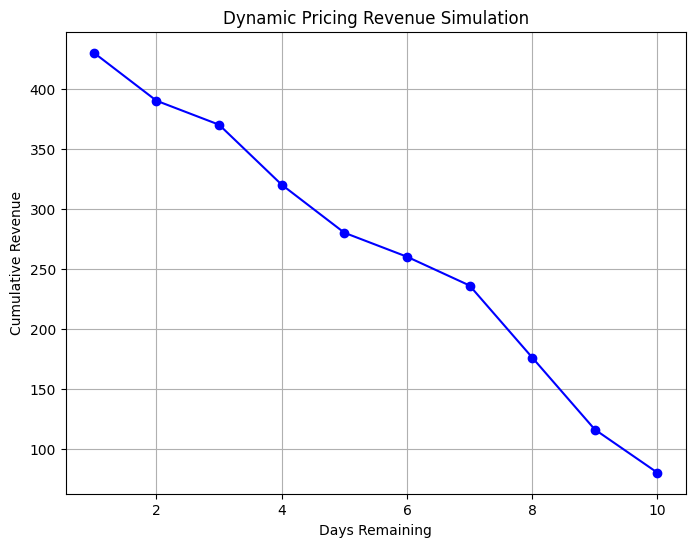

In [12]:
# fill in with Python code

import math
from typing import List, Tuple
import matplotlib.pyplot as plt
import numpy as np

def dynamic_price_optimization(T: int, M: int, prices: List[float], lambdas: List[float]) -> Tuple[List[List[float]], List[List[int]]]:
    """
    Solves the dynamic pricing problem via dynamic programming.
    
    Inputs:
        T       : int, number of days remaining (horizon)
        M       : int, number of masks initially in stock
        prices  : List[float] of length N, the set of possible prices [p1, p2, ..., pN]
        lambdas : List[float] of length N, the corresponding Poisson means for demand when setting price pi

    Outputs:
        dp     : List[List[float]], a 2D list where dp[t][m] is the optimal expected revenue with t days remaining and m masks.
        policy : List[List[int]], a 2D list where policy[t][m] gives the index (0-indexed) of the price to set at state (t, m).
    """
    N = len(prices)
    
    # Initialize the DP table.
    # dp[t][m] represents maximum expected revenue with t days remaining and m masks.
    dp = [[0.0 for m in range(M + 1)] for t in range(T + 1)]
    
    # policy[t][m] will store the index of the best price action.
    policy = [[-1 for m in range(M + 1)] for t in range(T + 1)]
    
    # Boundary conditions:
    # For t = 0 (no days left), dp[0][m] = 0 for all m.
    # Also, for m = 0 (no inventory), dp[t][0] = 0 for all t.
    
    # Fill the DP table iteratively for t = 1, 2, ..., T.
    for t in range(1, T + 1):
        for m in range(1, M + 1):
            best_val = -float('inf')
            best_action = None
            # Try each possible pricing action.
            for i in range(N):
                price = prices[i]
                lam = lambdas[i]
                expected_revenue = 0.0
                tail_prob = 0.0  # Will accumulate probability for k = 0,1,...,m-1
                
                # Sum over possible demand values k where k < m.
                for k in range(m):
                    pk = math.exp(-lam) * (lam ** k) / math.factorial(k)
                    tail_prob += pk
                    # If k masks are sold, immediate revenue is price * k
                    # and the remaining inventory is m - k.
                    expected_revenue += pk * (price * k + dp[t - 1][m - k])
                
                # For demand k >= m, we sell all m masks.
                pk_tail = 1 - tail_prob
                # In this case, immediate revenue is price * m, and inventory drops to 0.
                expected_revenue += pk_tail * (price * m + dp[t - 1][0])  # Note dp[t-1][0] is 0.
                
                # Choose the action that maximizes expected revenue.
                if expected_revenue > best_val:
                    best_val = expected_revenue
                    best_action = i
            dp[t][m] = best_val
            policy[t][m] = best_action
            
    return dp, policy

# Example usage:
if __name__ == "__main__":
    # Example parameters:
    T = 10  # days remaining until Halloween
    M = 50  # number of masks in stock
    prices = [10.0, 12.0, 15.0]  # possible prices
    lambdas = [5.0, 4.0, 3.0]     # corresponding Poisson means for customer demand
    
    dp, policy = dynamic_price_optimization(T, M, prices, lambdas)
    
    # Print optimal revenue for starting state (T days, M masks)
    print(f"Optimal expected revenue with {T} days and {M} masks: {dp[T][M]:.2f}")
    
    # For example, to know which price to set when there are 10 days left and 20 masks:
    t_query = 10
    m_query = 20
    best_price_index = policy[t_query][m_query]
    best_price = prices[best_price_index] if best_price_index != -1 else None
    print(f"Optimal price to set with {t_query} days and {m_query} masks: {best_price}")
    
    
    # let's create a simulation of the dynamic pricing problem
    # using the optimal policy computed above.
    # We will simulate the revenue over the remaining days
    # and plot the cumulative revenue over time.
    
    # Simulate the revenue over the remaining days using the optimal policy.
    revenue = 0.0
    revenue_list = []
    for t in range(T, 0, -1):
        best_price_index = policy[t][M]
        best_price = prices[best_price_index] if best_price_index != -1 else None
        demand = np.random.poisson(lambdas[best_price_index])
        revenue += best_price * min(demand, M)
        revenue_list.append(revenue)
        M -= min(demand, M)
        
    # Plot the cumulative revenue over time.
    plt.figure(figsize=(8, 6))
    plt.plot(range(T, 0, -1), revenue_list, marker='o', color='b')
    plt.xlabel("Days Remaining")
    plt.ylabel("Cumulative Revenue")
    plt.title("Dynamic Pricing Revenue Simulation")
    plt.grid(True)
    plt.show()
    
    



## Question 4: Risk-Aversion and Utility Optimization under CARA Utility (Led by Corentin)

You are tasked with analyzing the behavior of an investor who seeks to maximize their utility under **CARA Utility**. The investor has wealth $W$ and the CARA utility function:

$$
U(W) = \frac{1 - e^{-aW}}{a}, \quad a > 0,
$$

where $a$ represents the investor's **risk aversion**.

The investor allocates their wealth between:
1. A **riskless asset** with a fixed return $r$, and
2. A **risky asset** with return $R \sim \mathcal{N}(\mu, \sigma^2)$

The investor allocates a fraction $\pi$ of their wealth to the risky asset and $(1 - \pi)$ to the riskless asset. The wealth $W$ after one year is given by:

$$
W = (1 + r)(1 - \pi) + (1 + R)\pi.
$$

The goal is to analyze the investor’s optimal allocation $\pi$ to the risky asset and compute key risk-related quantities.

---

### Subquestions

#### Part (A): Expected Utility and Certainty-Equivalent Wealth

1. Derive the expression for the **expected utility** $\mathbb{E}[U(W)]$, using the given CARA utility function and assuming $R \sim \mathcal{N}(\mu, \sigma^2)$.
2. Using a Taylor expansion, approximate the **certainty-equivalent wealth** $W_{CE}$ up to second-order terms.

---

#### Part (B): Optimal Portfolio Allocation

Derive the optimal fraction $\pi^*$ of wealth to be allocated to the risky asset such that the **expected utility** $\mathbb{E}[U(W)]$ is maximized. Express $\pi^*$ in terms of $a$, $\mu$, $r$, and $\sigma^2$.

---

#### Part (C): Risk Premium

1. Using the results from Part (A), calculate the **absolute risk premium** $\pi_A = \mathbb{E}[W] - W_{CE}$.
2. Verify that $\pi_A \approx \frac{a \pi^2 \sigma^2}{2}$ for small $\sigma^2$.

---

#### Part (D): Numerical Calculations and Interpretation

Given the parameters $r = 0.02$, $\mu = 0.08$, $\sigma^2 = 0.04$, and $a = 3$:
1. Compute the optimal allocation $\pi^*$.
2. Calculate the certainty-equivalent wealth $W_{CE}$.
3. Compute the absolute risk premium $\pi_A$.
4. Interpret the results and discuss how changes in $a$ and $\sigma^2$ affect the risk premium and portfolio allocation.

---

#### Part (E): Expected Utility under Uniform Distribution

Now assume that the return of the risky asset, $R$, is no longer normally distributed. Instead, $R \sim \text{Uniform}[\alpha, \beta]$, where $\alpha$ and $\beta$ are the lower and upper bounds of the distribution, respectively.

1. Derive the new expression for the **expected utility** $\mathbb{E}[U(W)]$. Make sure to simplify your result as much as possible, and ensure that it explicitly depends on $a$, $\pi$, $\alpha$, $\beta$, and $r$.

**Hint**: Use the fact that if $W \sim \text{Uniform}[w_{\text{min}}, w_{\text{max}}]$, then:

$$
\mathbb{E}[g(W)] = \frac{1}{w_{\text{max}} - w_{\text{min}}} \int_{w_{\text{min}}}^{w_{\text{max}}} g(W) \, dW.
$$

---

### Part (A) Answer

<span style="color:red">

1- We know that $W = (1+r)(1-\pi)+(1+R)\pi$ with $R\sim\mathcal{N}(\mu,\sigma^2)$, so we can deduce that $$W \sim \mathcal{N}\left((1+r)(1-\pi)+(1+\mu)\pi,\pi^2\sigma^2\right)$$
Then we use the following lemma : If $X$ is a gaussian distribution then we have 
$$\mathbb{E}\left(e^{-aX}\right) = e^{-a\mathbb{E}(X)+\frac{a^2}{2}\mathbb{V}(X)}$$
Finally, we have 
$$\mathbb{E}(U(W)) = \frac{1-e^{-a((1+r)+(\mu-r)\pi)+\frac{a^2}{2}\pi^2\sigma^2}}{a}$$
\\
2- The certainty-equivalent wealth $W_{\text{CE}}$ verify $U(W_{\text{CE}}) = \mathbb{E}(U(W))$, in the other hand we also have 
\begin{align*}
\mathbb{E}(U(W)) &= \frac{1-e^{-a((1+r)+(\mu-r)\pi)+\frac{a^2}{2}\pi^2\sigma^2}}{a}\\
&= \frac{1-e^{-a((1+r)+(\mu-r)\pi-\frac{a}{2}\pi^2\sigma^2)}}{a}\\
&= U((1+r)+(\mu-r)\pi-\frac{a}{2}\pi^2\sigma^2)
\end{align*}
And $W_{\text{CE}} = (1+r)+(\mu-r)\pi-\frac{a}{2}\pi^2\sigma^2 = \mathbb{E}(W)-\frac{a}{2}\pi^2\sigma^2$, in this particular case the Taylor approximation is exact. 

</span>

### Part (B) Answer

<span style="color:red">

Let's recall that $\forall \pi\in[0,1], $
$$\mathbb{E}(U(W)) = U((1+r)+(\mu-r)\pi-\frac{a}{2}\pi^2\sigma^2)$$
Moreover, we know that $U$ is a non-decreasing function ($U'(x) = e^{-ax}>0$), thus maximizing $\mathbb{E}(U(W))$ is indentical to maximizing $(1+r)+(\mu-r)\pi-\frac{a}{2}\pi^2\sigma^2$. Finally , we have 
$$\pi^* = \left\{ 
    \begin{array}{ll}
    1 & \text{si } \mu - r > a\sigma^2 \\
    0 & \text{si } \mu < r \\
    \frac{\mu - r}{a\sigma^2} & \text{sinon}
    \end{array} 
\right.$$

</span>

### Part (C) Answer

<span style="color:red">

1 - According to the definition of the risk premium we have $\pi_A = \mathbb{E}(W)-W_{\text{CE}}$, and with the question (A) we can deduce that $\pi_A = \frac{a}{2}\pi^2\sigma^2$\
2 - As well as the first question, in this particular case of this utility function the taylor approximation $\pi_A\approx \frac{a\pi^2\sigma^2}{2}$ is exact.

</span>

### Part (D) Answer

<span style="color:red">


1- Let's recall 
$$\pi^* = \left\{ 
    \begin{array}{ll}
    1 & \text{si } \mu - r > a\sigma^2 \\
    0 & \text{si } \mu < r \\
    \frac{\mu - r}{a\sigma^2} & \text{sinon}
    \end{array} 
\right.$$

And $\frac{\mu - r}{a\sigma^2} = \frac{0.08-0.02}{3\times 0.04} = 0.5$ and $\pi^* = 0.5$, the portfolio is balanced between the risky and the non-risky asset.

2- We know that $W_{\text{CE}} = (1+r)+(\mu-r)\pi-\frac{a}{2}\pi^2\sigma^2$  and so $W_{\text{CE}} = 1+0.02+(0.08-0.02)0.5-\frac{3}{2}0.25\times 0.04 = 1.035$

3- In the same way, the risk premium is $\pi_A = \frac{3}{2}0.5^2\times 0.04 = 0.015$

4- 
As $ a $ increases, the optimal $ \pi^* $ decreases (more risk-averse investors take fewer risks).\
As $ \sigma^2 $ increases, $ \pi^* $ also decreases, reflecting greater aversion to riskier assets.\
The risk premium quantifies how much the investor is willing to pay to eliminate risk.



</span>

### Part (E) Answer

<span style="color:red">

1- We know that $W = (1+r)(1-\pi)+(1+R)\pi$ with $R\sim\mathcal{U}(\alpha,\beta)$, so we can deduce that $W \sim \mathcal{U}\left(\alpha',\beta'\right)$ with 
\begin{align*}
\alpha' &= (1+r)(1-\pi)+(1+\alpha)\pi \\
\beta' &= (1+r)(1-\pi)+(1+\beta)\pi
\end{align*}
So we have 
\begin{align*}
\mathbb{E}(U(W)) &= \frac{1}{\beta'-\alpha'}\int_{\alpha'}^{\beta'}U(t)dt\\
&= \frac{1}{\beta'-\alpha'}\int_{\alpha'}^{\beta'}\frac{1-e^{-at}}{a}dt\\
&= \frac{1}{a}+\frac{e^{-a\beta'}-e^{-a\alpha'}}{a^2(\beta'-\alpha')}\\
&= \frac{1}{a}+e^{-a(1+r-r\pi)}\frac{e^{-a\beta\pi}-e^{-a\alpha\pi}}{a^2\pi(\beta-\alpha)}
\end{align*}

</span>

## Question 5: Feeding Animals in a Zoo using Approximate Dynamic Programming (Led by Corentin)

You are tasked with developing a feeding strategy for a zoo using **Approximate Dynamic Programming (ADP)**. The zoo has a finite amount of food available each day, and you must distribute this food among a group of animals to maximize their overall satisfaction over a fixed time horizon $T$. 

Each animal has:
1. A **hunger level** $h_i(t) \in \mathbb{R}$ at time $t$, which increases as time passes without food and decreases when food is provided.
2. A **satisfaction function** $u_i(f) = \log(1 + f)$, where $f$ is the amount of food given to the animal. Satisfaction increases logarithmically with food.

You start each day with a total amount of food $F$ that you can distribute to the animals. The objective is to maximize the **cumulative satisfaction** of all animals over $T$ days while considering that food is finite and hunger levels evolve dynamically.

---

### Problem Dynamics:
1. **State**:
   - The state at time $t$ is the vector of hunger levels of all animals: $\mathbf{h}(t) = [h_1(t), h_2(t), \dots, h_N(t)]$, where $N$ is the number of animals.

2. **Action**:
   - The action $\mathbf{f}(t) = [f_1(t), f_2(t), \dots, f_N(t)]$ represents the food allocated to each animal, subject to the constraint:
     $$
     \sum_{i=1}^N f_i(t) \leq F.
     $$

3. **State Transition**:
   - Hunger levels evolve according to the dynamics:
     $$
     h_i(t+1) = \max(0, h_i(t) + \gamma - \delta f_i(t)),
     $$
     where $\gamma$ is the natural rate at which an animal's hunger increases, and $\delta$ is the rate at which feeding reduces hunger.

4. **Reward**:
   - The reward at each time step is the total satisfaction of all animals:
     $$
     r(\mathbf{h}(t), \mathbf{f}(t)) = \sum_{i=1}^N \log(1 + f_i(t)).
     $$

5. **Value Function Approximation**:
   - Use a **linear function approximation** for the value function:
     $$
     V(\mathbf{h}(t); \mathbf{w}) = \mathbf{w}^\top \phi(\mathbf{h}(t)),
     $$
     where $\phi(\mathbf{h}(t))$ is a feature vector derived from the state, and $\mathbf{w}$ is a weight vector learned during training.

6. **Objective**:
   - Use **Approximate Dynamic Programming (ADP)** to iteratively update the weights $\mathbf{w}$ and maximize the total cumulative reward:
     $$
     \max \ \mathbb{E} \left[\sum_{t=0}^{T-1} r(\mathbf{h}(t), \mathbf{f}(t)) \right].
     $$

---

### Subquestions

#### Part (A): State Representation
Write down the state vector $\mathbf{h}(t)$ and describe how it evolves over time based on the dynamics provided above.

---

#### Part (B): Reward Function
Derive the formula for the reward function $r(\mathbf{h}(t), \mathbf{f}(t))$ explicitly for $N=3$ animals. Assume specific food allocations $\mathbf{f}(t) = [f_1, f_2, f_3]$.

---

#### Part (C): Linear Function Approximation
Explain how the value function $V(\mathbf{h}(t))$ is approximated using the feature vector $\phi(\mathbf{h}(t))$ and the weight vector $\mathbf{w}$. Discuss why feature normalization is essential in this problem. What would happen if we didn't normalize the features?

---

#### Part (D): Numerical Simulation
Using the provided starter code, fill in all `TODO` areas. This will allow you to train the ADP model and compute the following:
1. The convergence of weights $\mathbf{w}$ over episodes.
2. The hunger levels of each animal over the time horizon $T$.
3. The total utility (cumulative reward) achieved over time for all animals.

**Hint**: What does the weight update formula from the slides tell you? We know that $\mathbf{w}_{t+1}=\mathbf{w}_t-\alpha_t\cdot\nabla_w\mathit{L}\left(\mathbf{w}_t\right)$. How can we use this?

**Hint**: You should only need to fill in $3$ lines for the code below; the idea here is to conceptually understand approximate dynamic programming, so if you're coding a lot, you might be overcomplicating things!

---

#### Part (E): Visualization
Visualization code is provided to generate the following $3$ graphs:
1. **Convergence of Weights**: The values of the weights $\mathbf{w}$ over training episodes.
2. **Hunger Levels Over Time**: The hunger levels of each animal over the time horizon $T$.
3. **Total Utility Over Time**: The cumulative utility (reward) achieved for all animals over the time horizon.

Comment briefly on each of these graphs, and for the weights graph, discuss why the weights[0] line looks different from the rest (if weights[0] doesn't look different, you might have done something wrong!).

---

### Part (A) Answer

<span style="color:red">

The state of the system at time $ t $ is represented as the hunger levels of all $ N $ animals:

$$
\mathbf{h}(t) = [h_1(t), h_2(t), \dots, h_N(t)]
$$

Each hunger level $ h_i(t) $ evolves dynamically according to the given state transition rule:

$$
h_i(t+1) = \max(0, h_i(t) + \gamma - \delta f_i(t))
$$

where:

- $ \gamma $ is the natural increase in hunger per time step (i.e., how much an animal’s hunger grows if it is not fed).
- $ \delta $ is the efficiency of food in reducing hunger.
- $ f_i(t) $ is the food allocated to animal $ i $ at time $ t $.


This means that if an animal receives no food, its hunger increases by $ \gamma $, while if it receives food, its hunger decreases proportionally to the amount of food allocated, scaled by $ \delta $. The function ensures hunger does not become negative.

</span>

### Part (B) Answer

<span style="color:red">

The reward function is defined as:

$$
r(\mathbf{h}(t), \mathbf{f}(t)) = \sum_{i=1}^{N} \log(1 + f_i(t))
$$

For $ N = 3 $ animals, the explicit reward function is:

$$
r(h_1, h_2, h_3, f_1, f_2, f_3) = \log(1 + f_1) + \log(1 + f_2) + \log(1 + f_3)
$$

where $ f_1, f_2, f_3 $ represent the food allocation to the three animals at time $ t $.

</span>

### Part (C) Answer

<span style="color:red">

The approximate value function is modeled as:

$$
V(\mathbf{h}(t); \mathbf{w}) = \mathbf{w}^\top \phi(\mathbf{h}(t))
$$

where:

-$ \phi(\mathbf{h}(t)) $ is a feature vector derived from the state (hunger levels).
-$ \mathbf{w} $ is the weight vector learned during training.


A typical choice for $ \phi(\mathbf{h}(t)) $ is:

$$
\phi(\mathbf{h}(t)) = [1, h_1, h_2, \dots, h_N]
$$

where the \textbf{first component is a bias term} (always 1), and the rest are the hunger levels, possibly normalized.

</span>

### Part (D) Answer

In [19]:
N = 3  # Number of animals
T = 10  # Time horizon
F = 10  # Total food available per time step
gamma = 1  # Hunger growth rate
delta = 0.5  # Feeding efficiency
alpha = 0.01  # Learning rate
regLambda = 0.01  # Regularization coefficient

# Feature function: Normalize hunger levels
def features(hunger_levels):
    norm_hunger = hunger_levels / (np.max(hunger_levels) + 1e-5)  # Normalize hunger levels
    return np.array([1] + list(norm_hunger))  # Add bias term

# Reward function
def reward(food_allocation):
    """Compute reward as the sum of logarithmic satisfaction."""
    return np.sum(np.log(1 + food_allocation))

# State transition function
def next_hunger(hunger_levels, food_allocation):
    """Compute next hunger levels based on current state and action."""
    return np.maximum(0, hunger_levels + gamma - delta * food_allocation)

# Bellman update with regularization
def bellman_update(states, actions, next_states, rewards, weights):
    """Perform one step of Bellman update for function approximation."""
    for s, a, ns, r in zip(states, actions, next_states, rewards):
        phi_s = features(s)
        phi_ns = features(ns)
        td_error = r + np.dot(weights, phi_ns) - np.dot(weights, phi_s)
        weights += alpha * td_error * phi_s - regLambda * weights  # Regularized update
    return weights

# ADP Training
def approximate_dynamic_programming(num_episodes=100):
    global weights
    weights = np.zeros(len(features(np.zeros(N))))  # Initialize weights
    episode_rewards = []  # Track cumulative rewards per episode
    weights_history = []  # Track weights over episodes

    for episode in range(num_episodes):
        hunger_levels = np.zeros(N)  # Initial state
        total_reward = 0

        for t in range(T):
            # Sample a random action: Food allocation
            food_allocation = np.random.uniform(0, F, size=N)
            food_allocation = food_allocation / np.sum(food_allocation) * F

            # Calculate reward and next state
            r = reward(food_allocation)
            next_hunger_levels = next_hunger(hunger_levels, food_allocation)

            # Bellman update
            weights = bellman_update(
                [hunger_levels],
                [food_allocation],
                [next_hunger_levels],
                [r],
                weights,
            )

            # Update current state and accumulate reward
            hunger_levels = next_hunger_levels
            total_reward += r

        # Track metrics
        episode_rewards.append(total_reward)
        weights_history.append(weights.copy())
        print(f"Episode {episode + 1}: Total Reward = {total_reward:.2f}")

    return episode_rewards, weights_history

# Simulate a single episode and track hunger levels and total utility
def simulate_policy_and_utility(weights):
    hunger_levels = np.zeros(N)  # Initial hunger levels
    hunger_history = []  # Track hunger levels over time
    total_utility = []  # Track total utility (cumulative rewards) over time
    cumulative_utility = 0  # Initialize cumulative utility

    for t in range(T):
        # Compute action (food allocation)
        food_allocation = np.random.uniform(0, F, size=N)
        food_allocation = food_allocation / np.sum(food_allocation) * F

        # Record hunger levels
        hunger_history.append(hunger_levels.copy())

        # Calculate reward (utility) for this timestep
        r = reward(food_allocation)
        cumulative_utility += r  # Add to cumulative utility
        total_utility.append(cumulative_utility)

        # Update hunger levels
        hunger_levels = next_hunger(hunger_levels, food_allocation)

    return np.array(hunger_history), np.array(total_utility)

# Run the training process
episode_rewards, weights_history = approximate_dynamic_programming()

Episode 1: Total Reward = 40.94
Episode 2: Total Reward = 40.67
Episode 3: Total Reward = 40.92
Episode 4: Total Reward = 41.49
Episode 5: Total Reward = 40.70
Episode 6: Total Reward = 39.15
Episode 7: Total Reward = 41.62
Episode 8: Total Reward = 40.65
Episode 9: Total Reward = 41.60
Episode 10: Total Reward = 41.90
Episode 11: Total Reward = 41.74
Episode 12: Total Reward = 40.84
Episode 13: Total Reward = 40.22
Episode 14: Total Reward = 41.46
Episode 15: Total Reward = 41.38
Episode 16: Total Reward = 39.47
Episode 17: Total Reward = 40.53
Episode 18: Total Reward = 41.39
Episode 19: Total Reward = 40.93
Episode 20: Total Reward = 41.52
Episode 21: Total Reward = 41.54
Episode 22: Total Reward = 40.70
Episode 23: Total Reward = 41.35
Episode 24: Total Reward = 41.01
Episode 25: Total Reward = 41.29
Episode 26: Total Reward = 40.97
Episode 27: Total Reward = 42.25
Episode 28: Total Reward = 41.00
Episode 29: Total Reward = 42.50
Episode 30: Total Reward = 40.89
Episode 31: Total R

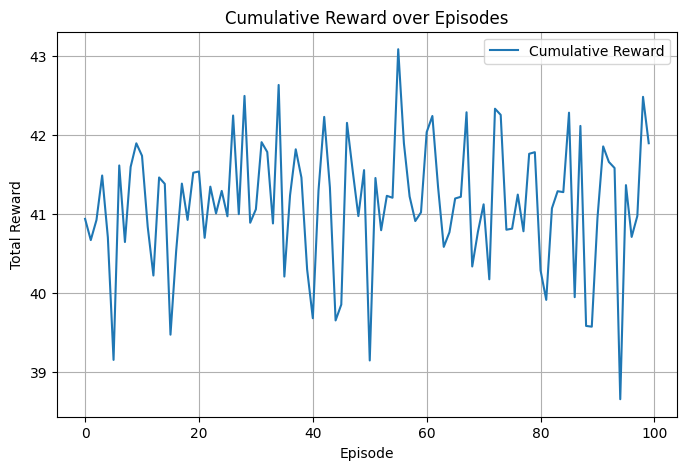

In [20]:
# Plot cumulative reward over episodes
plt.figure(figsize=(8, 5))
plt.plot(episode_rewards, label="Cumulative Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Cumulative Reward over Episodes")
plt.legend()
plt.grid()
plt.show()

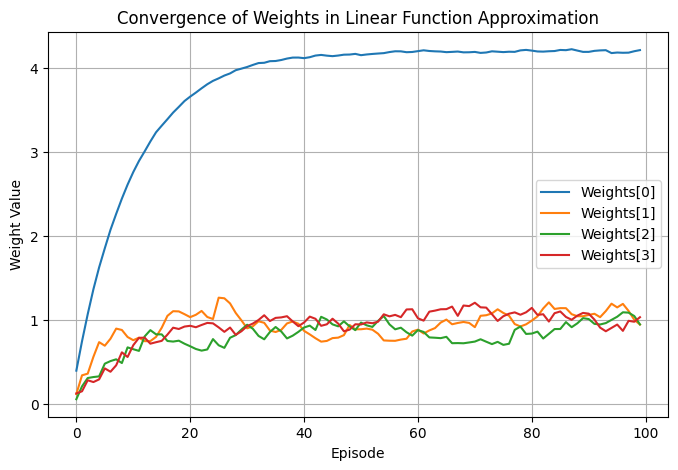

In [21]:
# Plot weights convergence
weights_history = np.array(weights_history)
plt.figure(figsize=(8, 5))
for i in range(weights_history.shape[1]):
    plt.plot(weights_history[:, i], label=f"Weights[{i}]")
plt.xlabel("Episode")
plt.ylabel("Weight Value")
plt.title("Convergence of Weights in Linear Function Approximation")
plt.legend()
plt.grid()
plt.show()

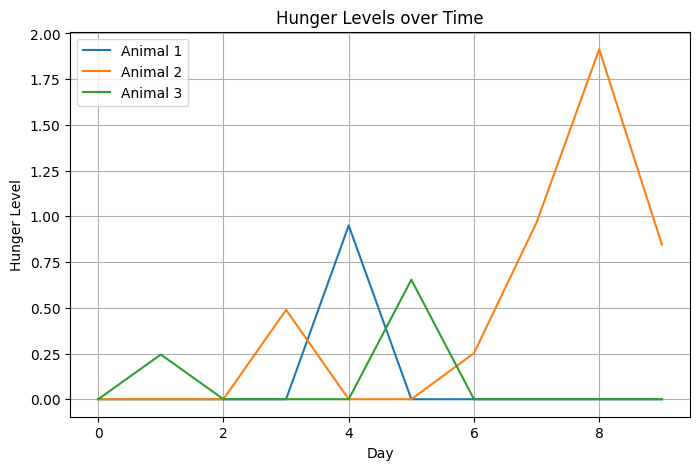

In [22]:
# Simulate policy and plot hunger levels and total utility over time
hunger_history, total_utility = simulate_policy_and_utility(weights)

# Plot hunger levels over time
plt.figure(figsize=(8, 5))
for i in range(hunger_history.shape[1]):
    plt.plot(hunger_history[:, i], label=f"Animal {i+1}")
plt.xlabel("Day")
plt.ylabel("Hunger Level")
plt.title("Hunger Levels over Time")
plt.legend()
plt.grid()
plt.show()

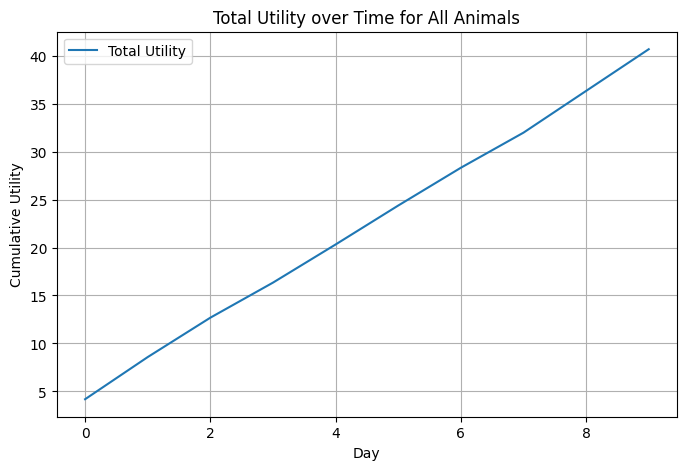

In [23]:
# Plot total utility over time
plt.figure(figsize=(8, 5))
plt.plot(range(T), total_utility, label="Total Utility")
plt.xlabel("Day")
plt.ylabel("Cumulative Utility")
plt.title("Total Utility over Time for All Animals")
plt.legend()
plt.grid()
plt.show()

### Part (E) Answer

<span style="color:red">


1- We can see in the first plot that the convergence of $V_t$ is very slow and this is because the reward function doesn't depend on the hunger level. 

2- We can observe that the parameters $\beta_0$ converges to its value, whereas other are more unstable. Indeed, the intercept value concverge to the mean of the value function.


</span>